#Anwendung der Fouriertransformation in der Bildverarbeitung
#### Jens Wagner 06/2015
<a  href="http://www.physi.uni-heidelberg.de/Einrichtungen/AP/python/FFT_lena.ipynb"<font> Download this notebook</font></a>

In [1]:
import numpy as np
from scipy.misc import lena
from matplotlib import pyplot as plt
%matplotlib inline 


#Testbild
lena=lena()

##Wer ist Lena?
<a  href="http://en.wikipedia.org/wiki/Lena_S%C3%B6derberg"<font> Wiki 1</font></a> <br>
<a  href="http://de.wikipedia.org/wiki/Lena_%28Testbild%29"<font> Wiki 2</font></a>


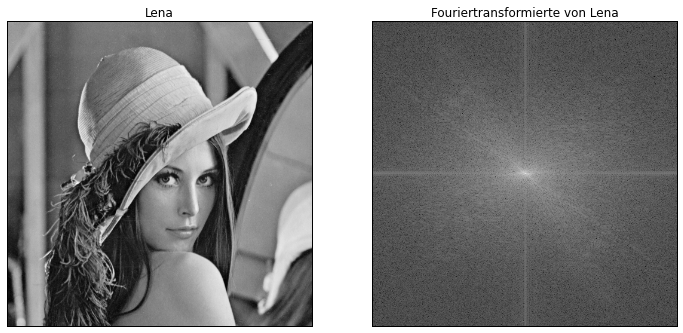

In [2]:
#Beugungsbild von lena
f = np.fft.fft2(lena)            #Fouriertransformation
fshift = np.fft.fftshift(f)      #Umsortieren
FT_lena=np.abs(fshift)
FT_lena_log = np.log(np.abs(fshift)) # mit log() wird der Kontrast angehoben


plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(lena, cmap = 'gray')
plt.title('Lena')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(FT_lena_log, cmap=plt.cm.gray)
plt.title('Fouriertransformierte von Lena')
plt.show()



###Kantenerkennung: tiefe Frequenzen (im Zentrum) werden aus dem Spektrum geloescht

In [3]:
#Harter Filter: Kreisblende
#Hochpassfilter: > in *****

hochpass = np.zeros((512, 512))
radius = 35  #Radius der Kreisblende
#generiere Lochblende:
lx, ly = lena.shape
for i in np.arange(512):
    for j in np.arange(512):
        if ((i-lx/2)**2 + (j-ly/2)**2 > radius**2):      #*****
            hochpass[i][j]=1
        else:
            hochpass[i][j]=0
#plt.imshow(hochpass, cmap = 'gray')     

In [4]:
lena_highpass=np.fft.fftshift(f) * hochpass                           #Filter auf Spektrum anwenden
lena_filtered=(np.abs(np.fft.ifft2(np.fft.ifftshift(lena_highpass)))) #Ruecktransformation in den Ortsraum

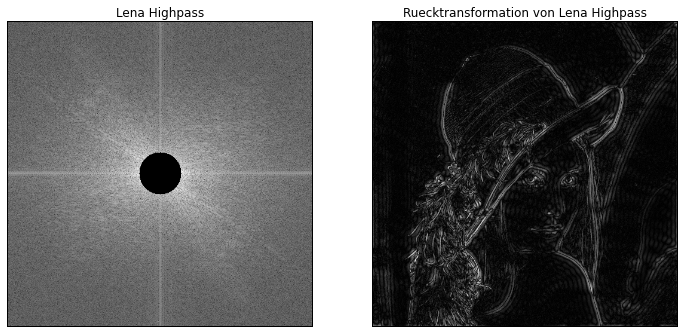

In [5]:
plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(np.abs(lena_highpass)**0.2, cmap = 'gray')   # Potenz dient der Kontrastanpassung
plt.title('Lena Highpass')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow((lena_filtered), cmap=plt.cm.gray)
plt.title('Ruecktransformation von Lena Highpass')
plt.show()

###Weichzeichnen: hohe Frequenzen werden aus dem Spektrum geloescht

In [6]:
#Harter Filter: Kreisblende
#Tiefpassfilter < in *****
tiefpass = np.zeros((512, 512))
radius = 50  #Radius der Kreisblende
#generiere Lochblende:
lx, ly = lena.shape
for i in np.arange(512):
    for j in np.arange(512):
        if ((i-lx/2)**2 + (j-ly/2)**2 < radius**2):      #*****
            tiefpass[i][j]=1
        else:
           tiefpass[i][j]=1e-100

In [7]:
lena_lowpass=np.fft.fftshift(f) * tiefpass                           #Filter auf Spektrum anwenden
lena_filtered=(np.abs(np.fft.ifft2(np.fft.ifftshift(lena_lowpass)))) #Ruecktransformation in den Ortsraum

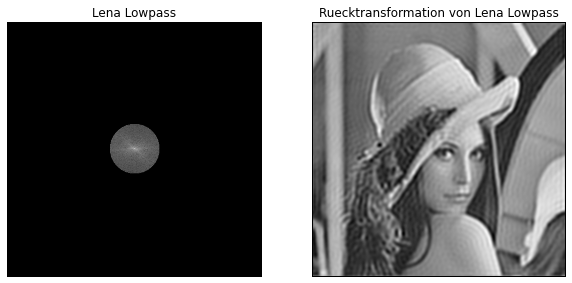

In [8]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(np.abs(lena_lowpass)**0.15, cmap = 'gray')   # Potenz dient der Kontrastanpassung
plt.title('Lena Lowpass')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow((lena_filtered), cmap=plt.cm.gray)
plt.title('Ruecktransformation von Lena Lowpass')
plt.show()

###Harte Filter (Kreisblende) fuehren zu Artefakten. Weichzeichnen mit weichem Gaussfilter

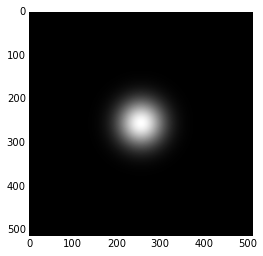

In [9]:
#http://stackoverflow.com/questions/29731726/how-to-calculate-a-gaussian-kernel-matrix-efficiently-in-numpy
#generiere Gaussfilter:
import scipy.stats as st
def gkern(kernlen, nsig):
    """Returns a 2D Gaussian kernel array."""

    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel
gaussfilter=gkern(512,10)
plt.imshow(gaussfilter, cmap = 'gray')

In [10]:
lena_lowpass_gauss=np.fft.fftshift(f) * gaussfilter                              #Filter auf Spektrum anwenden
lena_filtered_gauss=(np.abs(np.fft.ifft2(np.fft.ifftshift(lena_lowpass_gauss)))) #Ruecktransformation in den Ortsraum

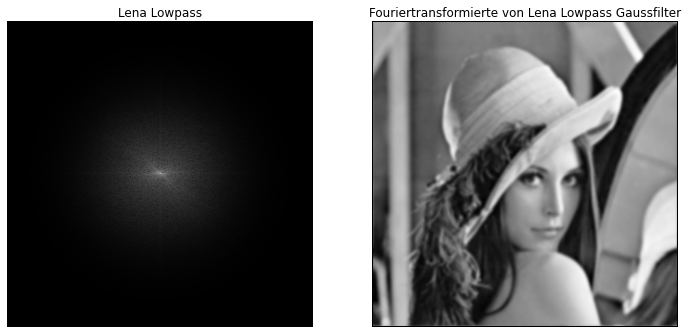

In [11]:
plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(np.abs(lena_lowpass_gauss)**0.2, cmap = 'gray')   # Potenz dient der Kontrastanpassung
plt.title('Lena Lowpass')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow((lena_filtered_gauss), cmap=plt.cm.gray)
plt.title('Fouriertransformierte von Lena Lowpass Gaussfilter')
plt.show()

###Vergleich: harter Filter (Kreisblende) - weicher Filter (Gaussfilter)

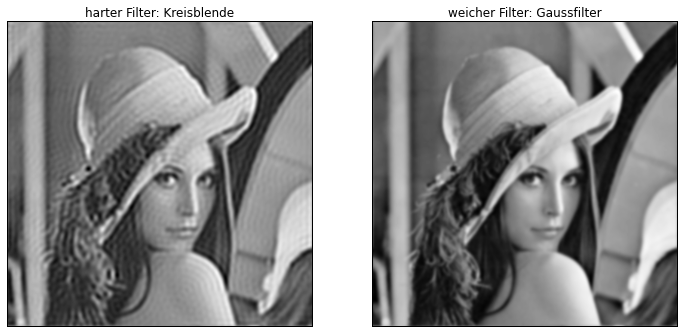

In [12]:
plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow((lena_filtered), cmap=plt.cm.gray)
plt.title('harter Filter: Kreisblende')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow((lena_filtered_gauss), cmap=plt.cm.gray)
plt.title('weicher Filter: Gaussfilter')